In [1]:
%pylab inline
import os
from glob import glob

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
kT = 0.593 # kcal/mol
run_dirs = sorted( glob("run_F*"), key=lambda x: float(x.split('_F')[1]))
tau_list = []
force_list = []
for run_dir in run_dirs:
    force = -float(run_dir.split('_F')[1])
    force_list.append(force)
    seed_colvar_files = glob(os.path.join(run_dir,"*/*.metad.dat"))
    rescaled_times = []
    for cv in seed_colvar_files:
        cv_data = np.loadtxt(cv)
        rescaled_times.append( np.prod(cv_data[-1,(0,-3)]) )
    tau_list.append(np.mean(rescaled_times))


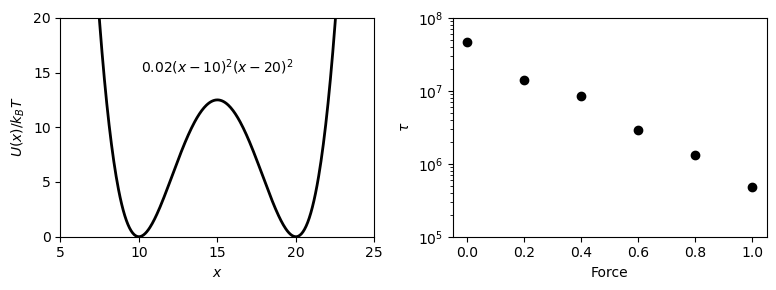

In [3]:
f, ax = plt.subplots(1,2,figsize=(8,3))

def pot(x):
    return 0.02*((x-10)**2 * (x-20)**2)

xpoints = np.arange(-5,25+0.1,0.05)
ypoints = pot(xpoints)
#ff: MATHEVAL ARG=d1 PERIODIC=NO FUNC=0.02*(((x-10)^2)*((x-20)^2))

ax[0].plot(xpoints,ypoints,c='k',linewidth=2)
ax[0].set_ylim(0,20)
ax[0].set_xlim(5,25)
ax[0].set_ylabel("$U(x)/k_B T$")
ax[0].set_xlabel("$x$")
ax[0].text(15,15,"$0.02 (x-10)^2(x-20)^2$",horizontalalignment='center')

ax[1].scatter(force_list, tau_list,c='k')
ax[1].set_yscale('log')
ax[1].set_xlabel("Force")
ax[1].set_ylabel("$\\tau$")
ax[1].set_ylim(1e5,1e8)

plt.tight_layout()
plt.savefig("potential_and_taus.png",dpi=150)
